# Walmart Business case study

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom
import math

# Defining Problem Statement and Analyzing basic metrics

## Import the dataset and do usual data analysis

In [2]:
df = pd.read_csv('walmart_data.csv')
df2 =pd.read_csv('walmart_data.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## shape of data, data types of all the attributes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [10]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [12]:
df.shape

(550068, 10)

**Observation:** 
> 1. there are 550068 rows and 10 columns
> 2. these are the 10 columns :  'User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'
> 3. There are no missing or null data in any of the columns

# Missing Value & Outlier Detection

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [14]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [15]:
df.describe(include=object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

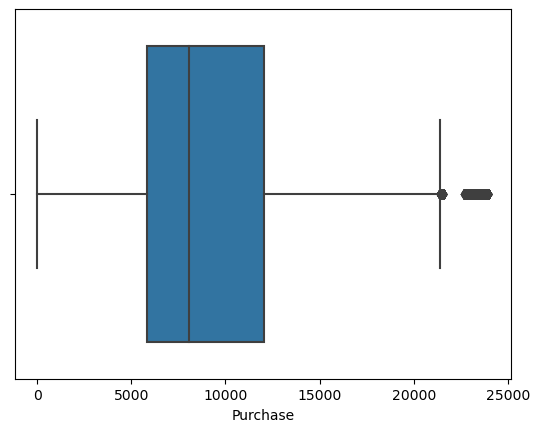

In [18]:
sns.boxplot(df['Purchase'])

In [21]:
p25 = df['Purchase'].quantile(0.25)
p75 = df['Purchase'].quantile(0.75)
iqr = p75 - p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr

In [22]:
df[df['Purchase'] > upper_limit]



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [24]:
df[df['Purchase'] < lower_limit]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


**Observation:** 2677 potential Purchase outliers identified 

D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation'>

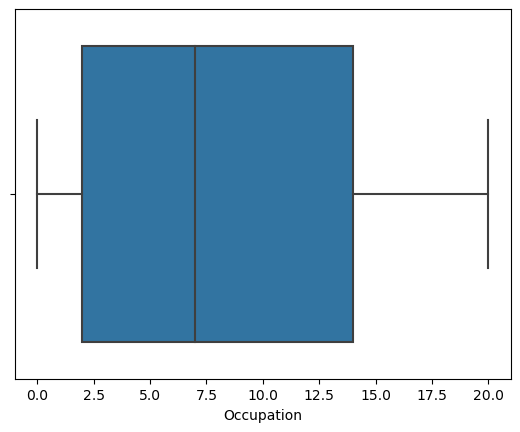

In [19]:
sns.boxplot(df['Occupation'])

In [25]:
p25 = df['Occupation'].quantile(0.25)
p75 = df['Occupation'].quantile(0.75)
iqr = p75 - p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr

In [26]:
df[df['Occupation'] > upper_limit]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [27]:
df[df['Occupation'] < lower_limit]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


**Observation:** No specific Occupation outlier identified

D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category'>

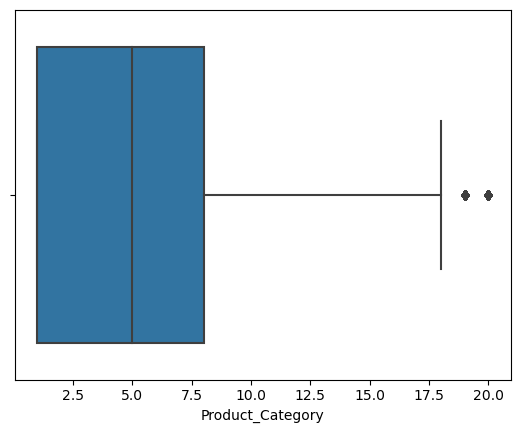

In [20]:
sns.boxplot(df['Product_Category'])

In [32]:
p25 = df['Product_Category'].quantile(0.25)
p75 = df['Product_Category'].quantile(0.75)
iqr = p75 - p25
upper_limit = p75 + 1.5 * iqr
lower_limit = p25 - 1.5 * iqr

In [33]:
df[df['Product_Category'] > upper_limit]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
545915,1000001,P00375436,F,0-17,10,A,2,0,20,612
545916,1000002,P00372445,M,55+,16,C,4+,0,20,119
545917,1000004,P00375436,M,46-50,7,B,2,1,20,481
545918,1000006,P00375436,F,51-55,9,A,1,0,20,480
545919,1000007,P00372445,M,36-45,1,B,1,1,20,241
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [34]:
df[df['Product_Category'] < lower_limit]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


**Observation:** Product Category has 4153 potential outliers

# Business Insights based on Non- Graphical and Visual Analysis 

## Non-Graphical Analysis: Value counts and unique attributes ​

In [36]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [37]:
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [38]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [39]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [40]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [41]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [42]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [43]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [44]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [45]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

**Observations:** The unique attributes and their corresponding value counts can be seen for the following fields

In [47]:
df.describe(include=object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


**Observation:** An overwhelming number of customers are Male.

## Visual Analysis - Univariate & Bivariate

In [48]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


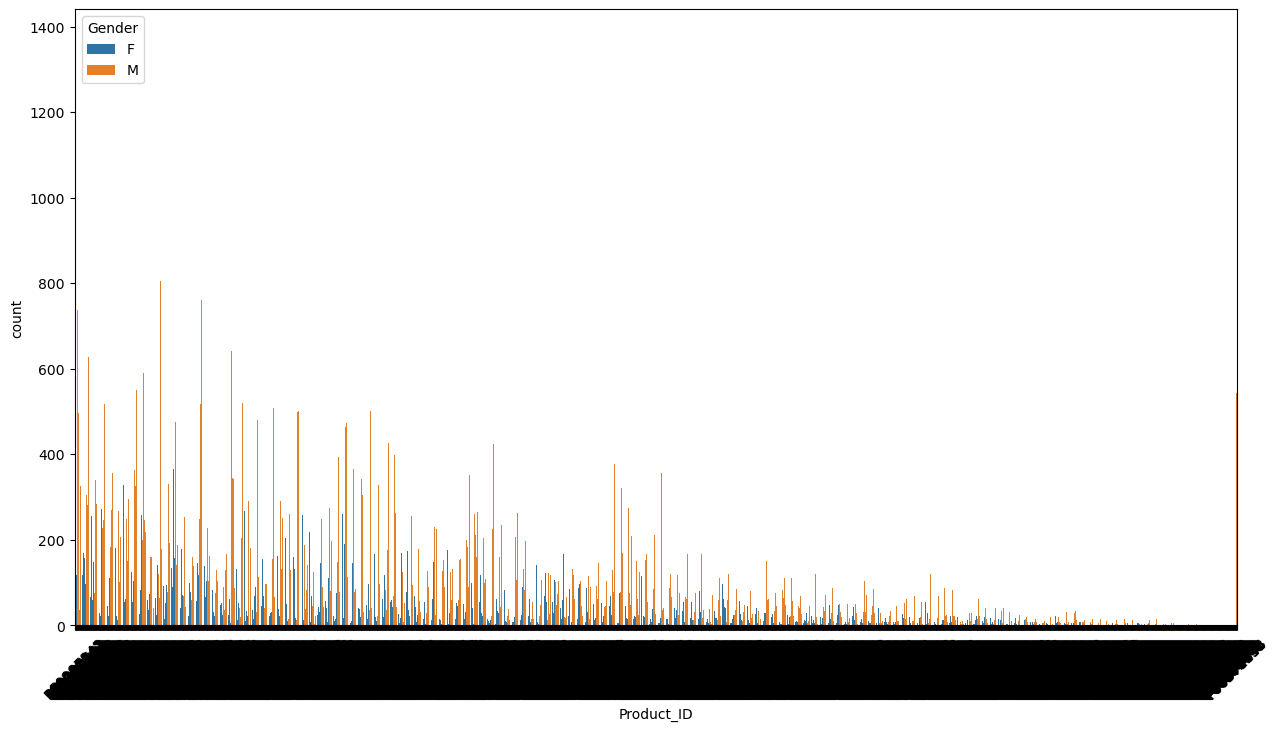

In [50]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(x ='Product_ID',hue='Gender', data = df)
plt.show()

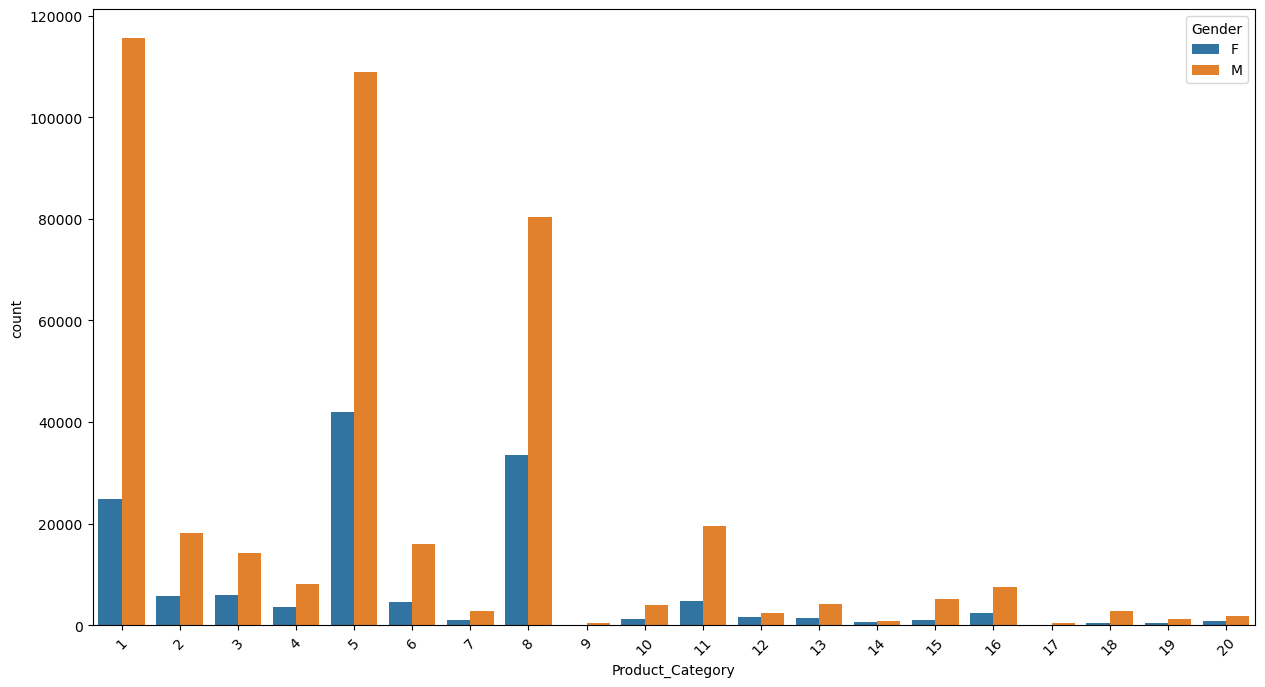

In [51]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(x ='Product_Category',hue='Gender', data = df)
plt.show()

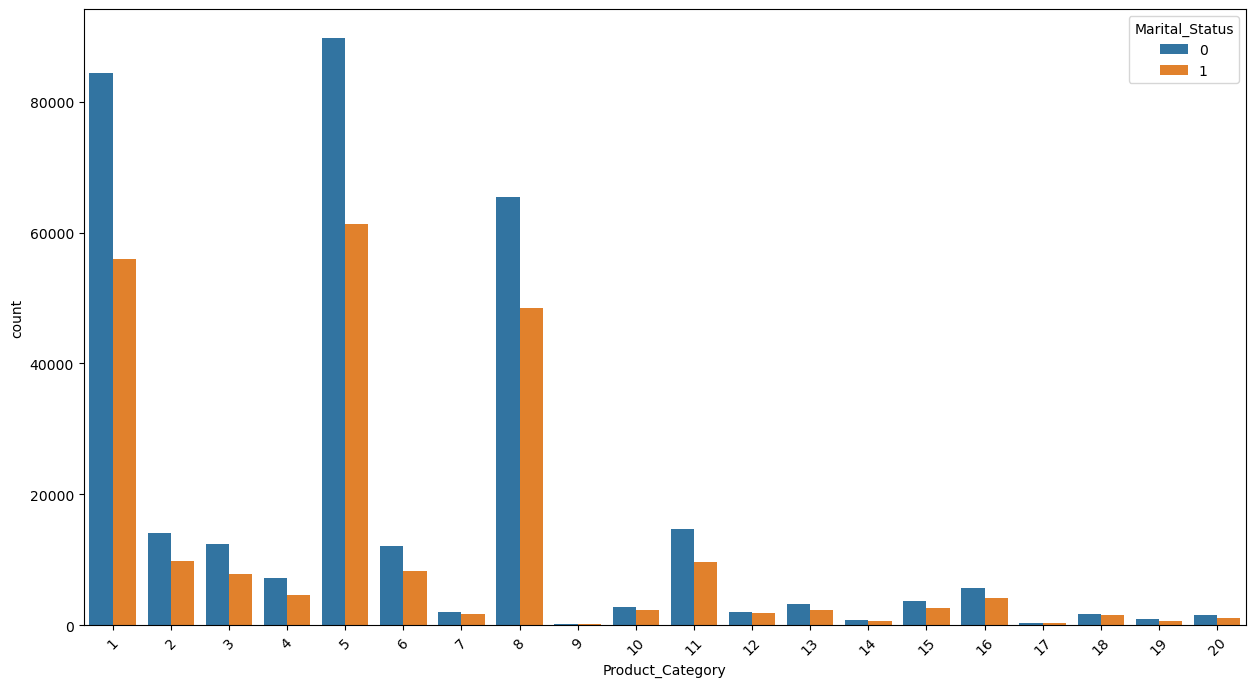

In [53]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(x ='Product_Category',hue='Marital_Status', data = df)
plt.show()

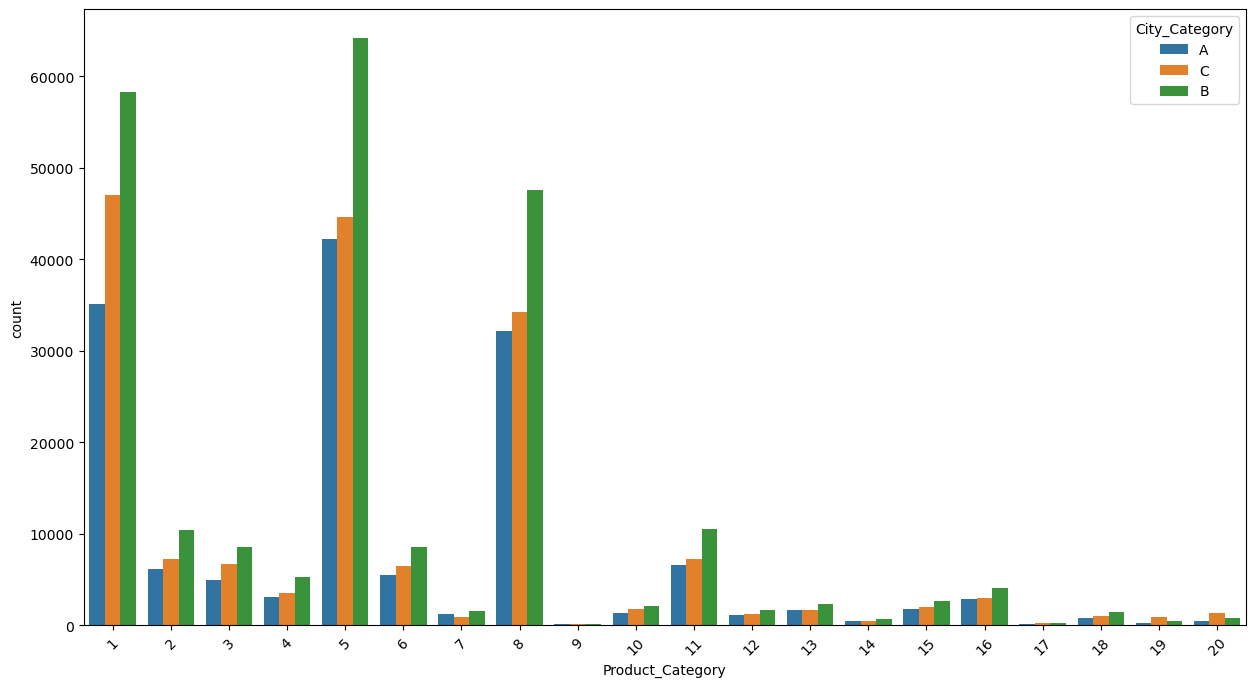

In [54]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(x ='Product_Category',hue='City_Category', data = df)
plt.show()

In [55]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


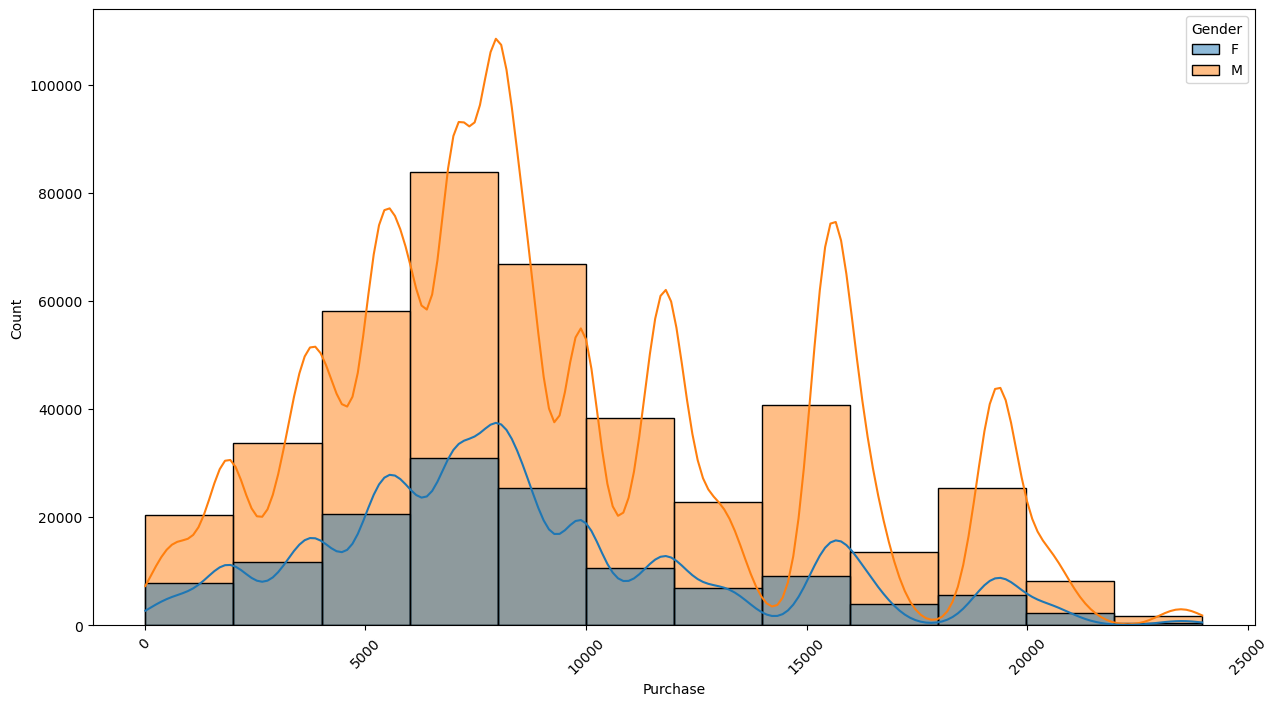

In [56]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(hue ='Gender',x="Purchase", bins=12, data = df, kde=True)
plt.show()

<AxesSubplot:>

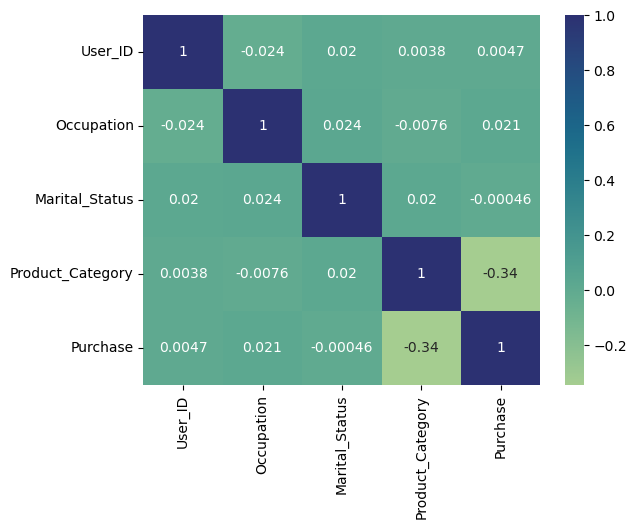

In [67]:

sns.heatmap(df.corr(),annot=True, cmap="crest")

**Obserbation:** Seems like only Product_Category and Purchase has some level of correlation.

<Figure size 800x800 with 0 Axes>

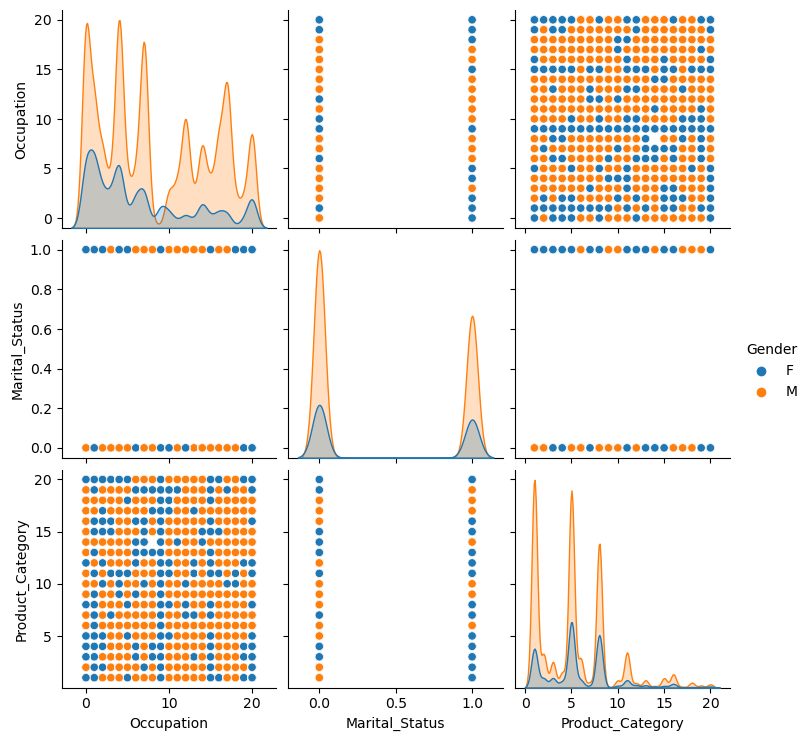

In [69]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df.iloc[:, 1:9],hue="Gender")

<Figure size 800x800 with 0 Axes>

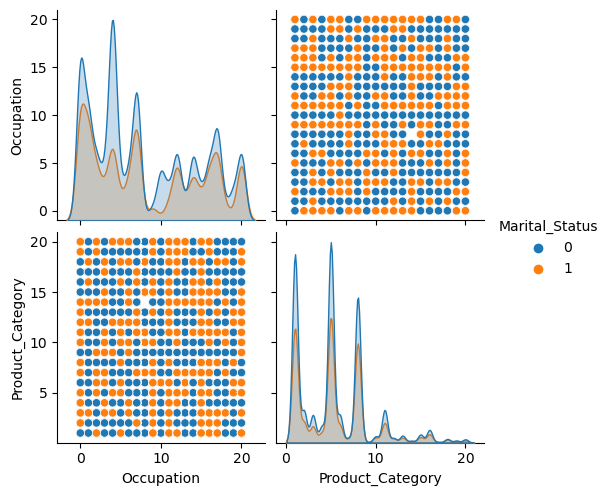

In [70]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df.iloc[:, 1:9],hue="Marital_Status")

# Illustrate the insights based on exploration and CLT

## Are women spending more money per transaction than men? Why or Why not?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df_male = df[df['Gender']=='M']
df_male

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,1,19,61
550058,1006024,P00372445,M,26-35,12,A,0,1,20,121
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550062,1006032,P00372445,M,46-50,7,A,3,0,20,473


<AxesSubplot:xlabel='Purchase', ylabel='Count'>

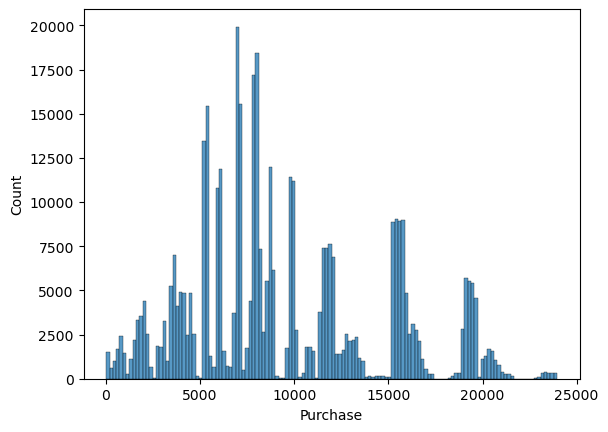

In [8]:
sns.histplot(df_male['Purchase'])

**Observation:** As can be seen the Male purchase is not following a Normal distribution . So performing sampling distribution of sample means of sample size 30 to get a Normal distribution so that we can apply CLT

In [8]:
df_sample_Male_30 = [np.mean(df_male.sample(30)['Purchase']) for i in range(6000) ] 
# limitting sampling to 6000 since my computer is hanging up with higher count

In [9]:
len(df_sample_Male_30) 

6000

<AxesSubplot:ylabel='Count'>

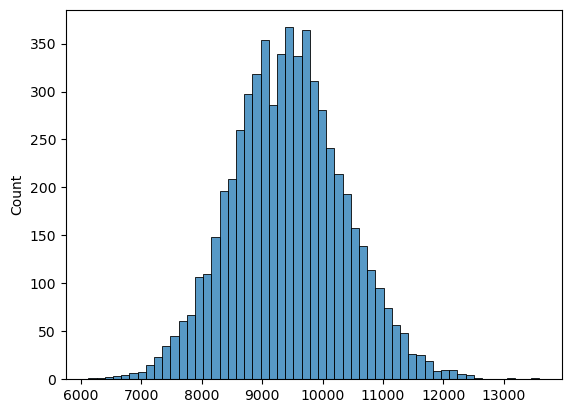

In [10]:
sns.histplot(df_sample_Male_30)

**Observation:** As can be seen the SDSM of sample size 30 follows a Normal distribution. Now we can apply CLT to identify 90%, 95% and 99% confidence interval for the population mean.  Since we dont know the SD for the population we will use the SDSM standard error as an approximation to population std. deviation.

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

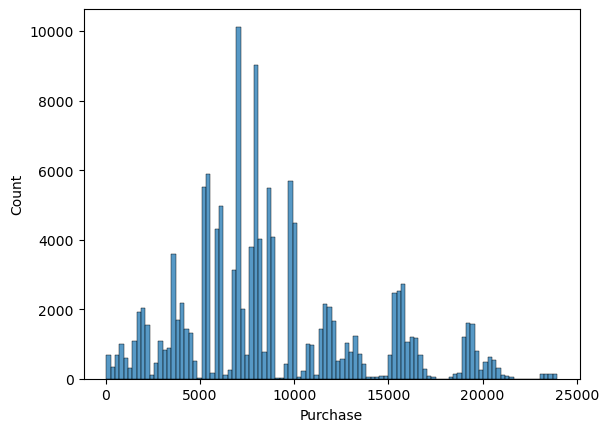

In [11]:
df_female = df[df['Gender']=='F']
df_female
sns.histplot(df_female['Purchase'])

In [12]:
df_sample_Female_30 = [np.mean(df_female.sample(30)['Purchase']) for i in range(6000) ] 
# limitting sampling to 6000 since my computer is hanging up with higher count

<AxesSubplot:ylabel='Count'>

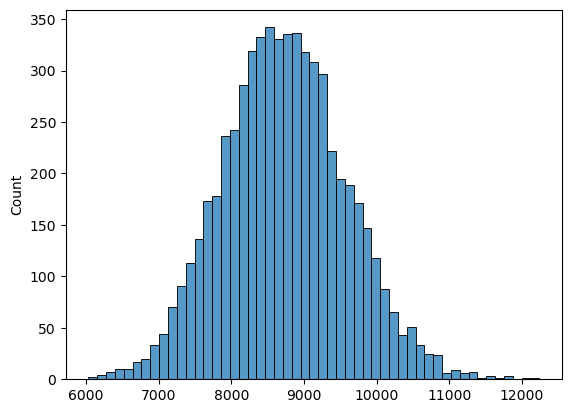

In [13]:
sns.histplot(df_sample_Female_30)

**Observation:** As seen above the SDSM for female purchase amount is created as well.

### Confidence intervals and distribution of the mean of the expenses by female and male customers

In [15]:
male_sample_mean = np.mean(df_sample_Male_30)
male_sample_mean

9428.535772222222

In [16]:
male_sample_std = np.std(df_sample_Male_30)
male_sample_std

931.6016613822471

In [21]:
# 90% confidence interval:

z = 1.65
lower_limit = male_sample_mean - (z * (male_sample_std / np.sqrt(30)))
upper_limit = male_sample_mean + (z * (male_sample_std / np.sqrt(30)))
print(lower_limit , "  ", upper_limit)

9147.89318772063    9709.178356723813


In [22]:
# 95% confidence interval:

z = 1.96
lower_limit = male_sample_mean - (z * (male_sample_std / np.sqrt(30)))
upper_limit = male_sample_mean + (z * (male_sample_std / np.sqrt(30)))
print(lower_limit , "  ", upper_limit)

9095.166399117303    9761.90514532714


In [23]:
# 99% confidence interval:

z = 2.58
lower_limit = male_sample_mean - (z * (male_sample_std / np.sqrt(30)))
upper_limit = male_sample_mean + (z * (male_sample_std / np.sqrt(30)))
print(lower_limit , "  ", upper_limit)

8989.712821910643    9867.3587225338


In [17]:
female_sample_mean = np.mean(df_sample_Female_30)
female_sample_mean

8729.618594444444

In [18]:
female_sample_std = np.std(df_sample_Female_30)
female_sample_std

850.2117334209486

In [24]:
# 90% confidence interval:

z = 1.65
lower_limit = female_sample_mean - (z * (female_sample_std / np.sqrt(30)))
upper_limit = female_sample_mean + (z * (female_sample_std / np.sqrt(30)))
print(lower_limit , "  ", upper_limit)

8473.494514666821    8985.742674222067


In [25]:
# 95% confidence interval:

z = 1.96
lower_limit = female_sample_mean - (z * (female_sample_std / np.sqrt(30)))
upper_limit = female_sample_mean + (z * (female_sample_std / np.sqrt(30)))
print(lower_limit , "  ", upper_limit)

8425.374233011633    9033.862955877255


In [26]:
# 99% confidence interval:

z = 2.58
lower_limit = female_sample_mean - (z * (female_sample_std / np.sqrt(30)))
upper_limit = female_sample_mean + (z * (female_sample_std / np.sqrt(30)))
print(lower_limit , "  ", upper_limit)

8329.133669701252    9130.103519187636


**Male confidence interval:**
> 1. 90% -  [9147.89318772063 ,   9709.178356723813]
> 2. 95% - [9095.166399117303 ,  9761.90514532714]
> 3. 99% - [8989.712821910643 ,  9867.3587225338]

**Female confidence interval**
> 1. 90% - [8473.494514666821  ,  8985.742674222067]
> 2. 95% - [8425.374233011633  ,  9033.862955877255]
> 3. 99% - [8329.133669701252  ,  9130.103519187636]

### Are confidence intervals of average male and female spending overlapping?

**Observation:** There is a slight overlap on the 99% confidence interval. But looking at 90% and 95% confidence interval there is absolutely no overlap so we can safely conclude that male on an average tend to spend more per transaction than female

### How can Walmart leverage this conclusion to make changes or improvements?

**Insight:**  More efforts need to be made to arrtract more Female customers with more targetted products for that demographic.

## Results when the same activity is performed for Married vs Unmarried

In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [28]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

**Confidence interval for un-married mean purchase amount:**

<AxesSubplot:ylabel='Count'>

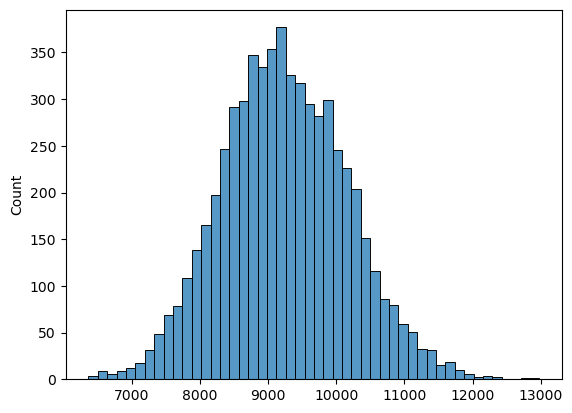

In [31]:
df_um = df[df['Marital_Status']== 0]

df_sample_UM_30 = [np.mean(df_um.sample(30)['Purchase']) for i in range(6000) ] 
# limitting sampling to 6000 since my computer is hanging up with higher count


UM_sample_mean = np.mean(df_sample_UM_30)
UM_sample_std = np.std(df_sample_UM_30)

sns.histplot(df_sample_UM_30)


In [32]:
# 90% confidence interval:

z = 1.65
lower_limit = UM_sample_mean - (z * (UM_sample_std / np.sqrt(30)))
upper_limit = UM_sample_mean + (z * (UM_sample_std / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8965.254927211678 , 9519.211983899433 ]


In [33]:
# 95% confidence interval:

z = 1.96
lower_limit = UM_sample_mean - (z * (UM_sample_std / np.sqrt(30)))
upper_limit = UM_sample_mean + (z * (UM_sample_std / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8913.216537037979 , 9571.250374073132 ]


In [34]:
# 99% confidence interval:

z = 2.58
lower_limit = UM_sample_mean - (z * (UM_sample_std / np.sqrt(30)))
upper_limit = UM_sample_mean + (z * (UM_sample_std / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8809.139756690582 , 9675.327154420529 ]


**Confidence interval for married mean purchase amount:**

<AxesSubplot:ylabel='Count'>

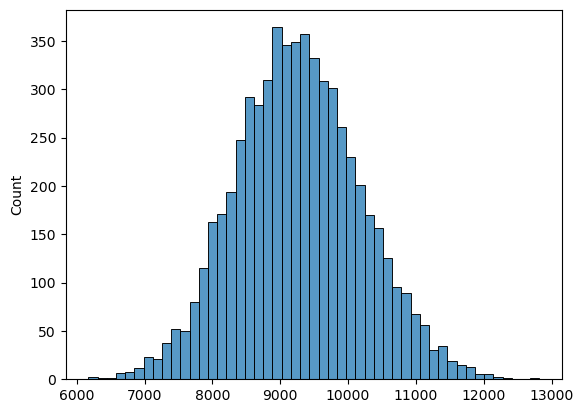

In [36]:
df_m = df[df['Marital_Status']== 1]

df_sample_M_30 = [np.mean(df_m.sample(30)['Purchase']) for i in range(6000) ] 
# limitting sampling to 6000 since my computer is hanging up with higher count


M_sample_mean = np.mean(df_sample_M_30)
M_sample_std = np.std(df_sample_M_30)

sns.histplot(df_sample_M_30)


In [37]:
# 90% confidence interval:

z = 1.65
lower_limit = M_sample_mean - (z * (M_sample_std / np.sqrt(30)))
upper_limit = M_sample_mean + (z * (M_sample_std / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8988.796530943242 , 9543.773724612312 ]


In [38]:
# 95% confidence interval:

z = 1.96
lower_limit = M_sample_mean - (z * (M_sample_std / np.sqrt(30)))
upper_limit = M_sample_mean + (z * (M_sample_std / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8936.662309719784 , 9595.90794583577 ]


In [39]:
# 99% confidence interval:

z = 2.58
lower_limit = M_sample_mean - (z * (M_sample_std / np.sqrt(30)))
upper_limit = M_sample_mean + (z * (M_sample_std / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8832.39386727287 , 9700.176388282685 ]


**Um-Married purchase confidence interval:**
> 1. 90% -  [ 8965.254927211678 , 9519.211983899433 ]
> 2. 95% -  [ 8913.216537037979 , 9571.250374073132 ]
> 3. 99% -  [ 8809.139756690582 , 9675.327154420529 ]

**Married purchase confidence interval:**
> 1. 90% -  [ 8988.796530943242 , 9543.773724612312 ]
> 2. 95% -  [ 8936.662309719784 , 9595.90794583577 ]
> 3. 99% -  [ 8832.39386727287 , 9700.176388282685 ]

**Observation:** there is significant overlap on the confidence interval between married and un-married so we cannot clearly tell that one group spend more on average over the other. 

## Results when the same activity is performed for Age

**Age group 0-17 confidence interval**

<AxesSubplot:ylabel='Count'>

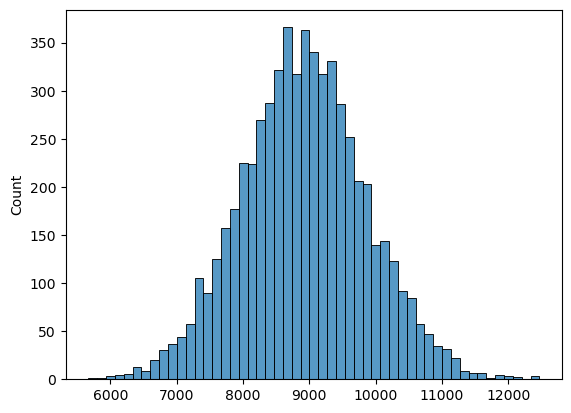

In [40]:
df_017 = df[df['Age']== '0-17']

df_sample_017_30 = [np.mean(df_017.sample(30)['Purchase']) for i in range(6000) ] 
# limitting sampling to 6000 since my computer is hanging up with higher count


sample_mean_017 = np.mean(df_sample_017_30)
sample_std_017 = np.std(df_sample_017_30)

sns.histplot(df_sample_017_30)


In [41]:
# 90% confidence interval:

z = 1.65
lower_limit = sample_mean_017 - (z * (sample_std_017 / np.sqrt(30)))
upper_limit = sample_mean_017 + (z * (sample_std_017 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8632.3344242008 , 9197.596842465866 ]


In [42]:
# 95% confidence interval:

z = 1.96
lower_limit = sample_mean_017 - (z * (sample_std_017 / np.sqrt(30)))
upper_limit = sample_mean_017 + (z * (sample_std_017 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8579.234015212265 , 9250.697251454401 ]


In [43]:
# 99% confidence interval:

z = 2.58
lower_limit = sample_mean_017 - (z * (sample_std_017 / np.sqrt(30)))
upper_limit = sample_mean_017 + (z * (sample_std_017 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8473.033197235192 , 9356.898069431474 ]


**Age group '18-25' confidence interval**

<AxesSubplot:ylabel='Count'>

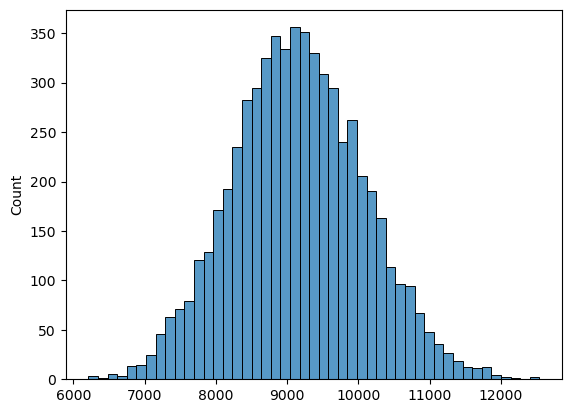

In [44]:
df_1825 = df[df['Age']== '18-25']

df_sample_1825_30 = [np.mean(df_1825.sample(30)['Purchase']) for i in range(6000) ] 
# limitting sampling to 6000 since my computer is hanging up with higher count


sample_mean_1825 = np.mean(df_sample_1825_30)
sample_std_1825 = np.std(df_sample_1825_30)

sns.histplot(df_sample_1825_30)


In [45]:
# 90% confidence interval:

z = 1.65
lower_limit = sample_mean_1825 - (z * (sample_std_1825 / np.sqrt(30)))
upper_limit = sample_mean_1825 + (z * (sample_std_1825 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8873.848491605455 , 9426.763097283434 ]


In [46]:
# 95% confidence interval:

z = 1.96
lower_limit = sample_mean_1825 - (z * (sample_std_1825 / np.sqrt(30)))
upper_limit = sample_mean_1825 + (z * (sample_std_1825 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8821.908028647826 , 9478.703560241063 ]


In [47]:
# 99% confidence interval:

z = 2.58
lower_limit = sample_mean_1825 - (z * (sample_std_1825 / np.sqrt(30)))
upper_limit = sample_mean_1825 + (z * (sample_std_1825 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8718.027102732569 , 9582.58448615632 ]


**Age group '26-35' confidence level**

<AxesSubplot:ylabel='Count'>

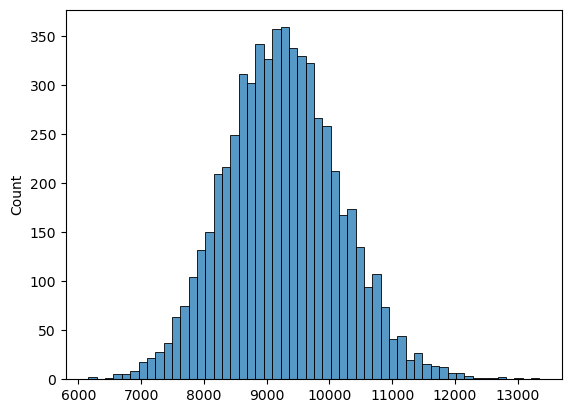

In [70]:
df_2635 = df[df['Age']== '26-35']

df_sample_2635_30 = [np.mean(df_2635.sample(30)['Purchase']) for i in range(6000) ] 
# limitting sampling to 6000 since my computer is hanging up with higher count


sample_mean_2635 = np.mean(df_sample_2635_30)
sample_std_2635 = np.std(df_sample_2635_30)

sns.histplot(df_sample_2635_30)


In [71]:
# 90% confidence interval:

z = 1.65
lower_limit = sample_mean_2635 - (z * (sample_std_2635 / np.sqrt(30)))
upper_limit = sample_mean_2635 + (z * (sample_std_2635 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8979.640912068266 , 9526.288532376177 ]


In [72]:
# 95% confidence interval:

z = 1.96
lower_limit = sample_mean_2635 - (z * (sample_std_2635 / np.sqrt(30)))
upper_limit = sample_mean_2635 + (z * (sample_std_2635 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8928.289165918128 , 9577.640278526314 ]


In [73]:
# 99% confidence interval:

z = 2.58
lower_limit = sample_mean_2635 - (z * (sample_std_2635 / np.sqrt(30)))
upper_limit = sample_mean_2635 + (z * (sample_std_2635 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8825.585673617854 , 9680.343770826588 ]


**Age group '36-45' confidence level**

<AxesSubplot:ylabel='Count'>

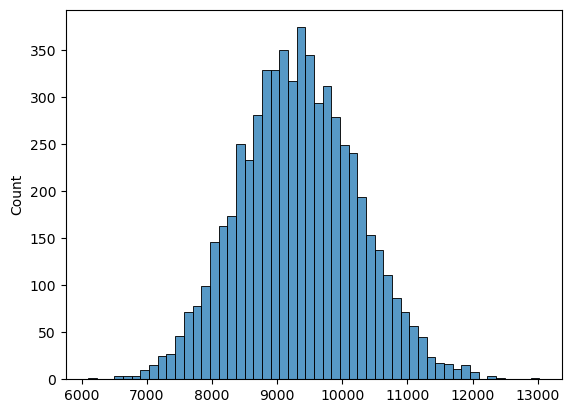

In [52]:
df_3645 = df[df['Age']== '36-45']

df_sample_3645_30 = [np.mean(df_3645.sample(30)['Purchase']) for i in range(6000) ] 
# limitting sampling to 6000 since my computer is hanging up with higher count


sample_mean_3645 = np.mean(df_sample_3645_30)
sample_std_3645 = np.std(df_sample_3645_30)

sns.histplot(df_sample_3645_30)


In [53]:
# 90% confidence interval:

z = 1.65
lower_limit = sample_mean_3645 - (z * (sample_std_3645 / np.sqrt(30)))
upper_limit = sample_mean_3645 + (z * (sample_std_3645 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 9051.188785030945 , 9597.645848302387 ]


In [54]:
# 95% confidence interval:

z = 1.96
lower_limit = sample_mean_3645 - (z * (sample_std_3645 / np.sqrt(30)))
upper_limit = sample_mean_3645 + (z * (sample_std_3645 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8999.854939693325 , 9648.979693640007 ]


In [55]:
# 99% confidence interval:

z = 2.58
lower_limit = sample_mean_3645 - (z * (sample_std_3645 / np.sqrt(30)))
upper_limit = sample_mean_3645 + (z * (sample_std_3645 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8897.187249018085 , 9751.647384315247 ]


**Age group '46-50' confidence level**

<AxesSubplot:ylabel='Count'>

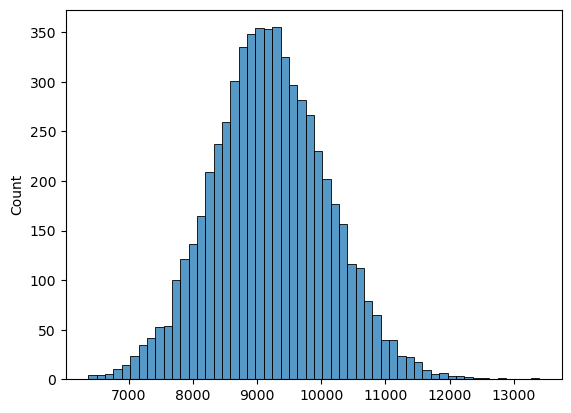

In [57]:
df_4650 = df[df['Age']== '46-50']

df_sample_4650_30 = [np.mean(df_4650.sample(30)['Purchase']) for i in range(6000) ] 
# limitting sampling to 6000 since my computer is hanging up with higher count


sample_mean_4650 = np.mean(df_sample_4650_30)
sample_std_4650 = np.std(df_sample_4650_30)

sns.histplot(df_sample_4650_30)


In [58]:
# 90% confidence interval:

z = 1.65
lower_limit = sample_mean_4650 - (z * (sample_std_4650 / np.sqrt(30)))
upper_limit = sample_mean_4650 + (z * (sample_std_4650 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8925.592878724332 , 9467.076965720113 ]


In [59]:
# 95% confidence interval:

z = 1.96
lower_limit = sample_mean_4650 - (z * (sample_std_4650 / np.sqrt(30)))
upper_limit = sample_mean_4650 + (z * (sample_std_4650 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8874.726191764123 , 9517.943652680322 ]


In [60]:
# 99% confidence interval:

z = 2.58
lower_limit = sample_mean_4650 - (z * (sample_std_4650 / np.sqrt(30)))
upper_limit = sample_mean_4650 + (z * (sample_std_4650 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8772.992817843704 , 9619.67702660074 ]


**Age group '51-55' confidence level**

<AxesSubplot:ylabel='Count'>

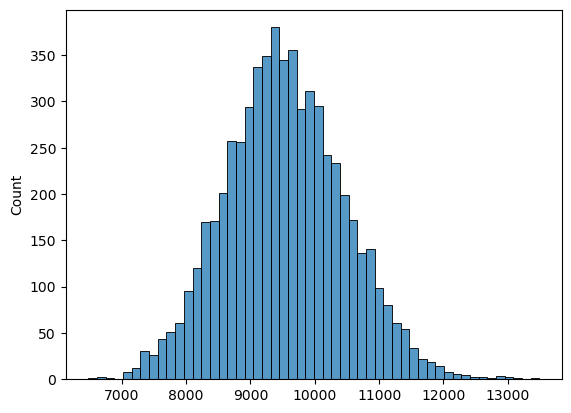

In [61]:
df_5155 = df[df['Age']== '51-55']

df_sample_5155_30 = [np.mean(df_5155.sample(30)['Purchase']) for i in range(6000) ] 
# limitting sampling to 6000 since my computer is hanging up with higher count


sample_mean_5155 = np.mean(df_sample_5155_30)
sample_std_5155 = np.std(df_sample_5155_30)

sns.histplot(df_sample_5155_30)


In [62]:
# 90% confidence interval:

z = 1.65
lower_limit = sample_mean_5155 - (z * (sample_std_5155 / np.sqrt(30)))
upper_limit = sample_mean_5155 + (z * (sample_std_5155 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 9254.902863667367 , 9811.414747443743 ]


In [63]:
# 95% confidence interval:

z = 1.96
lower_limit = sample_mean_5155 - (z * (sample_std_5155 / np.sqrt(30)))
upper_limit = sample_mean_5155 + (z * (sample_std_5155 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 9202.624474585344 , 9863.693136525766 ]


In [64]:
# 99% confidence interval:

z = 2.58
lower_limit = sample_mean_5155 - (z * (sample_std_5155 / np.sqrt(30)))
upper_limit = sample_mean_5155 + (z * (sample_std_5155 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 9098.067696421296 , 9968.249914689814 ]


In [29]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

**Age group '55+' confidence level**

<AxesSubplot:ylabel='Count'>

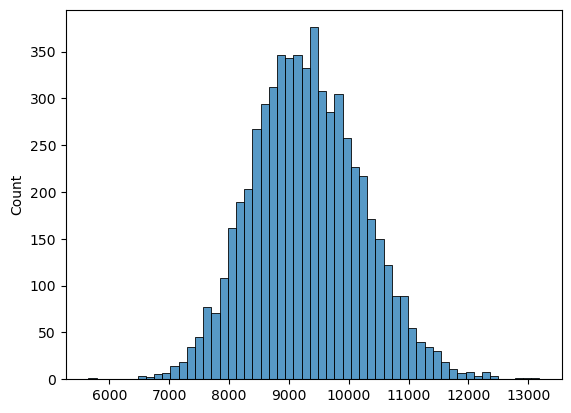

In [66]:
df_55 = df[df['Age']== '55+']

df_sample_55_30 = [np.mean(df_55.sample(30)['Purchase']) for i in range(6000) ] 
# limitting sampling to 6000 since my computer is hanging up with higher count


sample_mean_55 = np.mean(df_sample_55_30)
sample_std_55 = np.std(df_sample_55_30)

sns.histplot(df_sample_55_30)


In [67]:
# 90% confidence interval:

z = 1.65
lower_limit = sample_mean_55 - (z * (sample_std_55 / np.sqrt(30)))
upper_limit = sample_mean_55 + (z * (sample_std_55 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 9029.73302241017 , 9583.549788700942 ]


In [68]:
# 95% confidence interval:

z = 1.96
lower_limit = sample_mean_55 - (z * (sample_std_55 / np.sqrt(30)))
upper_limit = sample_mean_55 + (z * (sample_std_55 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8977.70781103134 , 9635.575000079773 ]


In [69]:
# 99% confidence interval:

z = 2.58
lower_limit = sample_mean_55 - (z * (sample_std_55 / np.sqrt(30)))
upper_limit = sample_mean_55 + (z * (sample_std_55 / np.sqrt(30)))
print("[",lower_limit , ",", upper_limit,"]")

[ 8873.65738827368 , 9739.625422837433 ]


**Age group 0-17 confidence interval:**
> 1. 90% - [ 8632.3344242008 , 9197.596842465866 ]
> 2. 95% - [ 8579.234015212265 , 9250.697251454401 ]
> 3. 99% - [ 8473.033197235192 , 9356.898069431474 ]


**Age group 18-25 confidence interval:**
> 1. 90% - [ 8873.848491605455 , 9426.763097283434 ]
> 2. 95% - [ 8821.908028647826 , 9478.703560241063 ]
> 3. 99% - [ 8718.027102732569 , 9582.58448615632 ]


**Age group 26-35 confidence interval:**
> 1. 90% - [ 8979.640912068266 , 9526.288532376177 ]
> 2. 95% - [ 8928.289165918128 , 9577.640278526314 ]
> 3. 99% - [ 8825.585673617854 , 9680.343770826588 ]


**Age group 36-45 confidence interval:**
> 1. 90% - [ 9051.188785030945 , 9597.645848302387 ]
> 2. 95% - [ 8999.854939693325 , 9648.979693640007 ]
> 3. 99% - [ 8897.187249018085 , 9751.647384315247 ]


**Age group 46-50 confidence interval:**
> 1. 90% - [ 8925.592878724332 , 9467.076965720113 ]
> 2. 95% - [ 8874.726191764123 , 9517.943652680322 ]
> 3. 99% - [ 8772.992817843704 , 9619.67702660074 ]

**Age group 51-55 confidence interval:**
> 1. 90% - [ 9254.902863667367 , 9811.414747443743 ]
> 2. 95% - [ 9202.624474585344 , 9863.693136525766 ]
> 3. 99% - [ 9098.067696421296 , 9968.249914689814 ]


**Age group 55+ confidence interval:**
> 1. 90% - [ 9029.73302241017 , 9583.549788700942 ]
> 2. 95% - [ 8977.70781103134 , 9635.575000079773 ]
> 3. 99% - [ 8873.65738827368 , 9739.625422837433 ]

## Comments on different variables when generalizing it for Population

**1. Male on an average spend more than Female**

**2. There is no difference on the average amount spent between married and un-married people**

**3. There is no difference on the average amount spent among the different age groups**

# Recommendations 

****
> 1. from the count plot it seems like on each product category um-married people tend to spend a bit more than married people. So more offers need to be made to un-married people to maximize profit.
> 2. Male customer are more than 3 times than that of Female. So products must be offered that attract more female.
> 3. There are product categories that sell in single digits so they need to be removed from inventory to save money
> 4. Most of the customers lie in the 18 to 45 Age group. So efforts must be made to retain them.
> 5. Product categories 1,5 and 8 out sell other catories. So efforts must be made to make sure other product categories also get attention other wise Walmart may end up being know for a particular set of products.
> 6. After CLT we can see that men on an average spend more than women. SO more products for women needs to be introduced so more of the Female demographic can be attracted to Walmart.